## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from numpy.random import seed
import tensorflow as tf
from sklearn.metrics import accuracy_score

Preprocessing the data, by deleting "br" word as vectorizer recognizes it as a word.

In [106]:
def delete_word_from_file(file_path, target_word):
    with open(file_path, 'r') as file:
        text = file.read()

    modified_text = text.replace(target_word, '')

    with open(file_path, 'w') as file:
        file.write(modified_text)

file_path = 'reviews.txt'
target_word = 'br'

delete_word_from_file(file_path, target_word)

In [107]:
reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)

print(type(reviews))
display(reviews.head())
display(Y.head())

<class 'pandas.core.frame.DataFrame'>


,0
0,omwell high is a cartoon comedy . it ran at th...
1,story of a man who has unnatural feelings for ...
2,homelessness or houselessness as george carli...
3,airport starts as a and new luxury plane...
4,illiant over acting by lesley ann warren . be...


,0
0,1
1,0
2,1
3,0
4,1


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

In [108]:
X_trainval, X_test, Y_trainval, Y_test = train_test_split(reviews.values.flatten(), Y.values.flatten(), stratify=Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_trainval, Y_trainval, test_size=0.25, stratify=Y_trainval ,random_state=42)  # 0.25 x 0.8 = 0.2

max_features = 10000
vectorizer = CountVectorizer(max_features=max_features)
X_train_bow = vectorizer.fit_transform(X_train)
X_val_bow = vectorizer.transform(X_val)
X_test_bow = vectorizer.transform(X_test)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_val_bow:", X_val_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

Shape of X_train_bow: (15000, 10000)
Shape of X_val_bow: (5000, 10000)
Shape of X_test_bow: (5000, 10000)


**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

Overview of the vocabulary

vectorizer.vocabulary_ contains 10k words with indices

In [109]:
vectorizer.vocabulary_

{'did': 2391,
 'not': 6038,
 'expect': 3084,
 'lot': 5274,
 'from': 3572,
 'this': 8975,
 'movie': 5816,
 'after': 164,
 'the': 8931,
 'terrible': 8901,
 'life': 5138,
 'is': 4670,
 'miracle': 5673,
 'it': 4683,
 'turns': 9258,
 'out': 6249,
 'that': 8928,
 'ten': 8885,
 'times': 9039,
 'worse': 9905,
 'than': 8923,
 'have': 4049,
 'impression': 4422,
 'director': 2431,
 'writer': 9931,
 'just': 4830,
 'joking': 4784,
 'with': 9846,
 'audience': 597,
 'let': 5112,
 'me': 5523,
 'see': 7786,
 'how': 4274,
 'much': 5824,
 'can': 1181,
 'you': 9971,
 'sustain': 8745,
 'dialogues': 2381,
 'are': 459,
 'empty': 2862,
 'scenario': 7692,
 'in': 4432,
 'few': 3299,
 'moments': 5740,
 'photography': 6528,
 'really': 7122,
 'nice': 5974,
 'sarcastic': 7652,
 'lines': 5179,
 'semi': 7817,
 'funny': 3601,
 'but': 1127,
 'hard': 4010,
 'to': 9059,
 'genuinely': 3697,
 'laugh': 5024,
 'during': 2685,
 'comedy': 1649,
 've': 9488,
 'laughed': 5027,
 'myself': 5867,
 'for': 3469,
 'being': 826,
 'able

Converting the X_train_bow ndarray to dataframe to get a frequency matrix where:
- each row corresponds to a review
- each column corresponds to a uniqe word from a vocabulary of 10000 most frequent words
- each cell represents the count of how many times each word appears in each review

In [110]:
df_X_train_bow = pd.DataFrame(X_train_bow.todense(), columns=vectorizer.get_feature_names_out())
display(df_X_train_bow)
sorted_column_sums = df_X_train_bow.sum().sort_values(ascending=False)
print(sorted_column_sums)

,aaham,aaron,abandon,abandoned,abbott,abc,abigail,abilities,ability,able,...,zizek,zodiac,zombi,zombie,zombies,zone,zoo,zoom,zorro,zu
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


the         202466
and          98228
of           87683
to           80886
is           64590
             ...  
waterman        18
kilmer          18
oops            18
keitel          18
baffling        18
Length: 10000, dtype: int64


Above list tells us what are the most popular words.

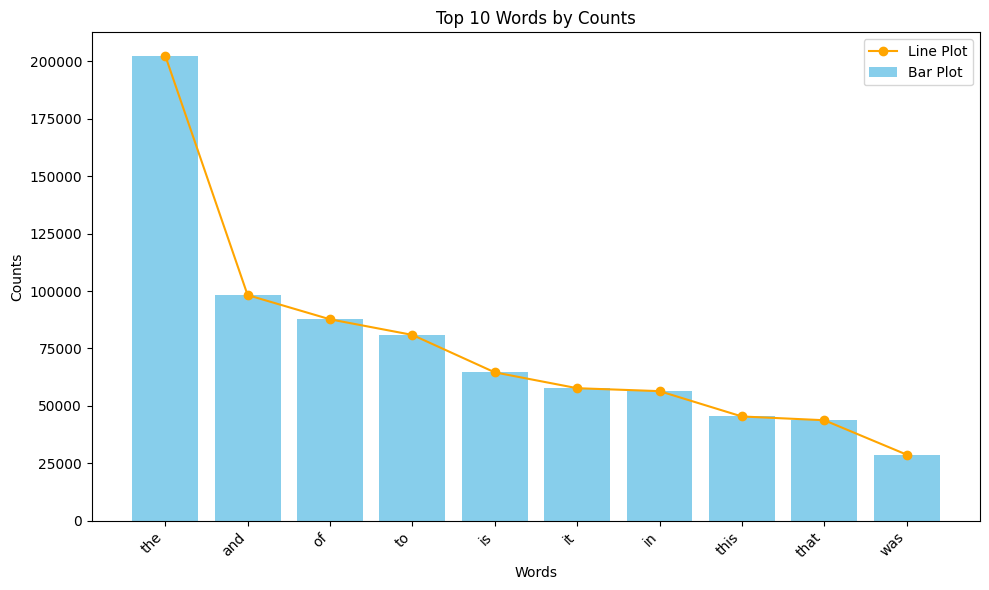

In [111]:
top_10 = sorted_column_sums[:10]

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size if needed

ax.bar(top_10.index, top_10.values, color='skyblue', label='Bar Plot')

ax.plot(top_10.index, top_10.values, marker='o', color='orange', linestyle='-', label='Line Plot')

ax.set_xlabel('Words')
ax.set_ylabel('Counts')
ax.set_title('Top 10 Words by Counts')
plt.xticks(rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

In [112]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,  # number of epochs with no improvement after which training will be stopped
    verbose=1,
    restore_best_weights=True  # restores model weights from the epoch with the best value of the monitored metric
)

seed(0)
tf.random.set_seed(0)

model = Sequential([
    Dense(units =30, activation='tanh', input_shape=(X_train_bow.shape[1],)),
    Dense(units =1, activation='sigmoid')
])

sgd = optimizers.SGD(learning_rate = 0.001)
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_bow, Y_train,
                    validation_data=(X_val_bow, Y_val),
                    epochs=40,
                    batch_size=32,
                    verbose=1,
                    callbacks=[early_stopping],)

c:\Users\mateu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5808 - loss: 0.6702 - val_accuracy: 0.6820 - val_loss: 0.6114
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6895 - loss: 0.6036 - val_accuracy: 0.7328 - val_loss: 0.5702
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7340 - loss: 0.5654 - val_accuracy: 0.7636 - val_loss: 0.5414
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7597 - loss: 0.5367 - val_accuracy: 0.7868 - val_loss: 0.5191
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7770 - loss: 0.5136 - val_accuracy: 0.7980 - val_loss: 0.5009
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7899 - loss: 0.4943 - val_accuracy: 0.8060 - val_loss: 0.4857
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8021 - loss: 0.4778 - val_accuracy: 0.8108 - val_loss: 0.4727
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8102 - loss: 0.4633 - val_accuracy: 0.

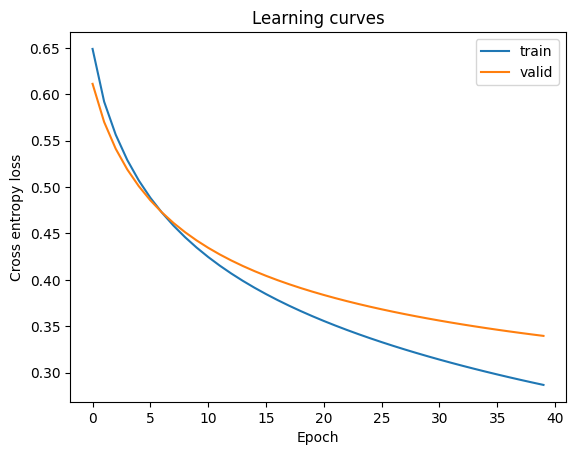

In [113]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

**(d)** Test your sentiment-classifier on the test set.

In [114]:
results = model.evaluate(X_test_bow, Y_test,
                    batch_size=32,
                    verbose=1)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8573 - loss: 0.3496


In [115]:
Y_test_pred = (model.predict(X_test_bow) > 0.5).astype("int32")

test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Test Accuracy:", test_accuracy)

print("Predictions = {}".format(Y_test_pred[:30].flatten()))
print("Labels      = {}".format(Y_test[:30].flatten()))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy: 0.8522
Predictions = [1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1]
Labels      = [1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1]


**(e)** Use the classifier to classify a few sentences you write yourselves. 

In [116]:
sentences = [
    "I have never left a theater hating every main character. The videographer and acting was great but my goodness the story and writing was horrible",
    "I think it was very well shot for the majority of the movie but the times when you were the ball or the first person view of Art and Patrick playing each other seemed like odd choices. The cast had great chemistry and Zendaya's portrayal of Tashi was really well done. By the end of the movie I wasn't completely sure what I was supposed to get especially the way it ended, but it did seem like a fitting end based on everything that happened. Definitely a good watch and a surprisingly good choice to see Dolby.",
    "this movie had me on edge! the actors! the score, all amazing! loved it!!",
    "Liked parts (loved Zendaya) but the musical score was disproportionately loud versus dialog, and annoyingly over dramatic for the most scenes. The directing was odd and distracting at times as well. Too bad. Could’ve been great.",
    "Very slow plot development! I had expected much more from reading RT reviews, but was highly disappointed!",
    "The plot is excellent, the chemistry is palpable, the acting superb, and the dialogue is amazing. I'm so glad I finally watched this. It didn't disappoint.",
    "Beautiful visuals and strong characters can't make up for the convoluted plot. Wakanda is wasted potential.",
    "Phoenix is phenomenal in this dark, gritty, and uncomfortable exploration of a troubled man's descent into madness. Brilliant but bleak.",
    "Soulless, pointless remake adds nothing to the beloved original. Impressive visuals, zero heart.",
    "Gaga shines in this emotional and well-acted drama about love, addiction, and the price of fame. A flawed but moving remake.",
    "The CGI stuff of nightmares. This baffling disaster of a film is the ultimate cinematic cat-astrophe.",
    "Scorsese's sprawling mob epic is a bit too long in the tooth but still captivating thanks to the de-aged De Niro."
]

X_sentences_bow = vectorizer.transform(sentences)

sentiment_labels = (model.predict(X_sentences_bow) > 0.5).astype("int32").flatten()

sentiment_mapping = {0: "negative", 1: "positive"}
sentiment_predictions = [sentiment_mapping[label] for label in sentiment_labels]

for sentence, sentiment in zip(sentences, sentiment_predictions):
    print("Sentence:", sentence)
    print("Predicted Sentiment:", sentiment)
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Sentence: I have never left a theater hating every main character. The videographer and acting was great but my goodness the story and writing was horrible
Predicted Sentiment: negative

Sentence: I think it was very well shot for the majority of the movie but the times when you were the ball or the first person view of Art and Patrick playing each other seemed like odd choices. The cast had great chemistry and Zendaya's portrayal of Tashi was really well done. By the end of the movie I wasn't completely sure what I was supposed to get especially the way it ended, but it did seem like a fitting end based on everything that happened. Definitely a good watch and a surprisingly good choice to see Dolby.
Predicted Sentiment: positive

Sentence: this movie had me on edge! the actors! the score, all amazing! loved it!!
Predicted Sentiment: positive

Sentence: Liked parts (loved Zendaya) but the musical score was disproportionately loud versus dialog, and